<a href="https://colab.research.google.com/github/Aranzasuu/ADA-Informes/blob/main/Informe_7_Cutting_a_Rod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROGRAMACIÓN DINÁMICA**

La programación dinámica es un método para reducir el tiempo de ejecución de un algoritmo mediante la utilización de subestructura óptima (usar soluciones óptimas de subproblemas para encontrar la solución óptima del problema en su conjunto). Los pasos generales para problemas de éste tipo son:

- Caracterización la estructura de una solución óptima.

- Definición del valor óptimo de manera recursiva.

- Cálculo del valor de la solución óptima.

- Contruir la solución óptima a partir de la información calculada.

In [27]:
# Importación de las librerías
import matplotlib.pyplot as plt
import math
import datetime
import seaborn as sns
from timeit import repeat
import numpy as np
import random
from termcolor import colored

In [37]:
# GENERAR INSTANCIAS

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

# **1. PROBLEMA DE OPTIMIZACIÓN**

## **1.1 Descripción del problema**
### **↪ Corte de varillas:**
Una  empresa compró barras de acero largas y las cortó en barras de acero forjado para la venta. El proceso de corte en sí no tiene costo. La gerencia de la compañía quiere conocer el mejor plan de corte.

Supongamos que sabemos que Serling vende una barra de acero con una longitud de $i$ pulgadas a un precio de $p_i$. La longitud de las barras de acero son todas pulgadas. La siguiente tabla muestra una lista de precios de muestra:

> ![image](https://i.imgur.com/OnnxZFy.jpg)

## **1.2 Análisis del problema**

El problema de corte de varillas consiste en dada una longitud $n$ pulgadas y una lista de precios $p = [p_1, p_2,...,p_n]$, debemos encontrar el mejor corte para maximizar los ingresos por venta. Algo a considerar es también que la solución más óptima sea no cortar la barra.

Considere el caso de $n = 4$. La siguiebte figura muestra todas las opciones de corte posibles para barras de acero de 4 pulgadas, incluidas las que no cortan en absoluto. Donde si observamos la solución más óptima corresponde partir la barra a la mitad donde da una ganancia de 10.

> ![image](https://www.programmerclick.com/images/564/b4e504163cb70924ef094e37184ca85c.png)

---

## DATOS:

**↪ 𝙴𝚗𝚝𝚛𝚊𝚍𝚊:** Una varilla de largo $n$ y un vector de precios de cada medida $p = [1...n]$

**↪ 𝚂𝚊𝚕𝚒𝚍𝚊:** Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

# **2. EXPLICACIÓN ALGORITMO**

Para resolver este problema, podemos implementar el algoritmo de varias formas:

1. Recursividad
2. Programación dinámica → Bottom-Up
3. Programación dinámica → Top-Down

Pero en este informe, sólo se implementará la forma recursiva y la técnica Bottom-Up.

## **2.1 PROGRAMACIÓN DINÁMICA**

↪ Para este tipo de problemas no basta con con el paradigma *divide y vencerás* por lo que utilizaremos **programación dinámica** para definir una solución de forma eficiente temporalmente, donde se almacenarán los datos para evitar cálculos innecesarios.

↪ Para empezar, definiremos como $r_n$ nuestra solución óptima, y puede estar dada por el precio equivalente al total de la barra o por subvarillas de precios $p_i$, donde sumadas da el total de la varilla. Es por esto que nuestra función está definida por:

> **SUBESTRUCTURA ÓPTIMA:** $r_n = max_{1 ≤ i ≤ n}(p_i + r_{n-i})$ 
>
> ![image](https://i.imgur.com/FRwuvHg.png)
>
> Teniendo en cuenta que $n$ es la longitud máxima de la varilla $p$, $p_i$ es el precio del corte $i$ y $r_{n-i}$ es el valor retornado máximo del valor calculado con anterioridad.

**Pero, ¿Cómo trabaja?**

1. Debemos crear un arreglo auxiliar para poder ir guardando las soluciones de cada sub-problema, inicializandolo como $r[0] = 0$, ya que la ganancia de vender 0 es 0.

2. Para el proceso de iteración, a través de un ciclo for donde $j$ va desde 1 hasta $n+1$, inicializaremos nuestra variable $aux = 0$ para poder calcular los sub-problemas e iremos recorriendo el arreglo de precios.

3. En su ciclo anidado, se irá buscando la suma máxima que se pueda generar con los diferentes cortes según su precio, donde se irá comparando $aux$ con los precios de i-ésimo corte $price[i]$ más el valor calculado que se encuentra guardado en el arreglo de los retornos, donde el mayor se guardará en la posición $r[j]$.

4. Finalmente, se retorna el valor máximo encontrado dentro de nuestro arreglo en la posición $n$.

Ahora veremos su implementación a través de un código.

### **2.1.1 CÓDIGO**

In [29]:
comparison = 0

def rodCutBotUp(price, n,verbose):

    global comparison
 
    r = [None] * (n + 1)      # Lugar donde se almacenarán los retornos máximos
    c = [[]] * (n + 1)        # Cortes
    r[0] = 0                  # Longitud 0 tiene una ganancia de $0

    # Iteración para calcular cada máximo de los subproblemas
    for j in range(1, n + 1):

        comparison += 1

        if verbose:
          print(colored(f"> Subproblema {str(j)}", "cyan"))

        r[j] = 0
        aux = float("-inf")     # Establecemos el valor mínimo
        s = [n]                 # Establecemos al arreglo con cortes base

        # Segunda iteración para encontrar el máximo entre las r-posibilidades
        for i in range(1, j+1):

            if verbose:
              print(colored(f"   >> i = {str(i)}", "green"))
              print(f"   aux = {aux}")
              print(f"   largo para la siguiente iteración = {n-i-1}")

            tmp = price[i-1] + r[j-i]

            if verbose:
              print(f"   tmp = {tmp} => p[{i-1}] + r[{j-i}] = {price[i-1]} + {r[j-i]} = {price[i-1] + r[j-i]}\n")
            
            if aux < tmp:
              aux = tmp

              if i == 0: c = []
              else: s = [i]

              for x in c[j-i]:
                s.append(x)
            
            else:
              aux = aux
              s = s

              
        r[j] = aux
        c[j] = s

        if verbose:
          print(colored(f"> r = {str(r)}", "red"))
          print("-----------------------------------\n")

    return r[n], c[n]

# EJEMPLO
price = cutrod_instance_generator(10)
n = len(price) - 1
maximo, corte = rodCutBotUp(price, n, verbose = False)
print("Para el vector de precios total >>", price)
print("Largo >>",n)
print('Valor máximo >>', maximo)
print("Largo cortes >>", corte)
print("cantidad subproblemas >>", comparison)

Para el vector de precios total >> [4, 4, 9, 11, 21, 30, 32, 39, 48, 53]
Largo >> 9
Valor máximo >> 48
Largo cortes >> [9]
cantidad subproblemas >> 9


### **2.1.2 PASO A PASO (VERBOSE = TRUE)**

In [30]:
price = cutrod_instance_generator(10)
n = len(price)
print("DATOS: \n-----------------------------------\n")
print("ARREGLO DE PRECIOS >>", price)
print("PARA UN LARGO >>",n)
print("\nPROCESO: \n-----------------------------------\n")
maximo, corte = rodCutBotUp(price, n, verbose = True)
print('VALOR MÁXIMO >>', maximo)

DATOS: 
-----------------------------------

ARREGLO DE PRECIOS >> [7, 17, 25, 25, 29, 31, 33, 37, 38, 48]
PARA UN LARGO >> 10

PROCESO: 
-----------------------------------

> Subproblema 1
   >> i = 1
   aux = -inf
   largo para la siguiente iteración = 8
   tmp = 7 => p[0] + r[0] = 7 + 0 = 7

> r = [0, 7, None, None, None, None, None, None, None, None, None]
-----------------------------------

> Subproblema 2
   >> i = 1
   aux = -inf
   largo para la siguiente iteración = 8
   tmp = 14 => p[0] + r[1] = 7 + 7 = 14

   >> i = 2
   aux = 14
   largo para la siguiente iteración = 7
   tmp = 17 => p[1] + r[0] = 17 + 0 = 17

> r = [0, 7, 17, None, None, None, None, None, None, None, None]
-----------------------------------

> Subproblema 3
   >> i = 1
   aux = -inf
   largo para la siguiente iteración = 8
   tmp = 24 => p[0] + r[2] = 7 + 17 = 24

   >> i = 2
   aux = 24
   largo para la siguiente iteración = 7
   tmp = 24 => p[1] + r[1] = 17 + 7 = 24

   >> i = 3
   aux = 24
   largo p

### **2.1.3 EJEMPLO**

Para entender de mejor manera el funcionamiento de este algoritmo veremos un ejemplo paso a paso, siguiendo la estructura de este.

**↪ 𝙴𝚗𝚝𝚛𝚊𝚍𝚊:** $[1,5,8,9,10,17,17,20]$ y largo $n = 4$.

1. Creamos el arreglo $r$ que guardará las máximas soluciones de cada corte, este será incializado con $None$ y la primera posición será 0:

> $r = [None] * (n+1)$
> $r[0] = 0$
> $r = [0, vacio, vacio, vacio, vacio]$

- Una variable a considerar es nuestro $aux$ que nos ayudará a comparar con las demás soluciones de los subproblemas ya resueltos.

> $aux = p[i-1] + r[j-i]$

2. Ahora ingresaremos al ciclo $for$ donde iniciaremos en la posición $j = 1$ y comenzaremos iterando:

> $i = 0$ → $p[0] + r[1-1] = 1 + 0 ⇒ 1 > aux (-∞) ⇒ aux = 1$
>
> $r[j] = aux ⇒ r[1] = 1$
>
> $r = [0, 1, vacio, vacio, vacio]$

3. Seguimos iterando, ahora con $j = 2$:

> $i = 0$ → $p[0]+r[2-1] = 1 + 1 ⇒ 2 > aux (-∞) ⇒ aux = 2$
>
> $i = 1$ → $p[1]+r[2-2] = 5 + 0 ⇒ 5 > aux (2) ⇒ aux = 5$
>
> $r[j] = aux ⇒ r[2] = 5$
>
> $r = [0, 1, 5, vacio, vacio]$

4. Continuamos con $j = 3$:

> $i = 0$ → $p[0] + r[3-1] = 1 + 5 ⇒ 6 > aux (-∞) ⇒ aux = 6$
>
> $i = 1$ → $p[1] + r[3-2] = 5 + 1 ⇒ 6 = aux (6) ⇒ aux = 6$
> 
> $i = 2$ → $p[2] + r[3-3] = 8 + 0 ⇒ 8 > aux ⇒ aux = 8$
>
> $r[j] = aux ⇒ r[3] = 8$
>
> $r = [0, 1, 5, 8, vacio]$

5. Finalmente, realizamos la última iteración con $j = 4$:

> $i = 0$ → $p[0] + r[4-1] = 1 + 8 ⇒ 9 > aux (-∞) ⇒ aux = 9$
>
> $i = 1$ → $p[1] + r[4-2] = 5 + 5 ⇒ 10 > aux (9) ⇒ aux = 10$
>
> $i = 2$ → $p[2] + r[4-3] = 8 + 1 ⇒ 9 < aux (10) ⇒ aux = 10$
>
> $i = 3$ → $p[3] + r[4-4] = 9 + 0 ⇒ 9 < aux (10) ⇒ aux = 10$
>
> $r[j] = aux ⇒ r[4] = 10$
>
> $r = [0, 1, 5, 8, 10]$

Así obteniendo que el valor máximo para una varilla de largo 4 es 10.

## **2.2 RECURSIVIDAD**

El método de solución recursiva simple, corta la barra de acero de la izquierda a una sección de longitud $i$, luego continúa cortando la sección restante de longitud $n-i$ a la derecha, sin cortar la sección izquierda. La forma de descomponer el problema es descomponer la barra de acero de longitud $n$ en el segmento inicial a la izquierda, y el resultado de la descomposición continua de la parte restante. El esquema sin ningún corte puede describirse como: la longitud del primer segmento es n, y el retorno es $p_n$, La longitud de la parte restante es $0$, el ingreso correspondiente $r_0 = 0$. Para que pueda obtener la siguiente fórmula:

> $r_n = max(p_i + r_n-i)$

### **2.2.1 CÓDIGO RECURSIVO**

In [31]:
recursion = 0

def cutRodRec(p, n, verbose):

  global recursion

  maximo = 0

  if n == 0: return 0, maximo  # Caso Base

  q = float("-inf")

  # Iteramos para recorrer el arreglo
  for i in range(1,n):

    if verbose:
      print("---------------\nvalor i >>", i)
      print("Longitud actual >>",n)
      print("Longitud siguiente recursión >>", n-i,"\n")

    # Llamada recursiva que retorna el maximo y los cortes
    aux, _ = cutRodRec(p, n-i-1, verbose)

    # Calculamos el máximo entre nuestra variable q y la recursión calculada

    recursion += 1

    if q > p[i] + aux: q = q
    else: q = p[i] + aux

  return q, maximo

precios = cutrod_instance_generator(10)
n = len(precios)

optimo, corte = cutRodRec(precios, n, verbose = False)
print("Para el vector de precios total >>", precios)
print("Largo >>",n)
print("El coste máximo >>", optimo)
print(f"Cortes cantidad >> ({len(precios[:corte+1])} , {len(precios[corte+1:n])})")
print("Cantidad de recursiones >>", recursion)

Para el vector de precios total >> [1, 1, 2, 12, 13, 22, 24, 29, 35, 44]
Largo >> 10
El coste máximo >> 44
Cortes cantidad >> (1 , 9)
Cantidad de recursiones >> 88


### **2.2.2 PASO A PASO (VERBOSE = TRUE)**

In [32]:
precios = cutrod_instance_generator(10)
n = len(precios)//2 - 1

optimo, corte = cutRodRec(precios, n, verbose = True)
print("\nPara el vector de precios total >>", precios)
print("Largo >>",n)
print("El coste máximo >>", optimo)

---------------
valor i >> 1
Longitud actual >> 4
Longitud siguiente recursión >> 3 

---------------
valor i >> 1
Longitud actual >> 2
Longitud siguiente recursión >> 1 

---------------
valor i >> 2
Longitud actual >> 4
Longitud siguiente recursión >> 2 

---------------
valor i >> 3
Longitud actual >> 4
Longitud siguiente recursión >> 1 


Para el vector de precios total >> [7, 14, 16, 20, 22, 29, 33, 36, 39, 39]
Largo >> 4
El coste máximo >> 28


# **3. CORRECTITUD**

> **Teorema:** Este algoritmo recibe un arreglo $p$ indicando el precio $p_i$ de una varilla de largo $i$, y un valor $n$ siendo el tamaño de la varilla, la cual se desea maximizar la ganancia.

**PRUEBA DEL TEOREMA**

**↪ Hipótesis:** El algoritmo con técnica Bottom Up tiene como salida el valor que al cortar una varilla de largo $n$ que maximize el precio. Para esto se demostrará a través de **inducción matemática**:

> **Caso Base:** Cuando $n = 0$, el algoritmo retorna 0, ya que se asume que ese valor es el máximo ya que siempre será el mismo, por lo que $P(0)$ se cumple.
>
> **Caso Inductivo:** Como ya comprobamos que nuestro caso base se cumple, debemos comprobar para lo demás casos donde $m < n$ y se utilizan las soluciones anteriores. Por lo que en cada iteración nos aseguramos que se almacenará siempre el máximo valor en el arreglo.

Ya que para cada subproblema $j$ se revisará desde $i$ hasta $j$ el valor máximo, donde si $aux < tmp$, $aux = price[i] + r[j-i-1]$ en caso contrario conserva su valor. Así calculando el retorno máximo para $r[j]$

Cuando llegue al final de la iteración, es decir $j = n$ se habrá calculado todos los cortes posibles y almacenado el máximo de cada uno, por lo que podemos concluir que el **algoritmo es correcto** para el algoritmo en su totalidad y también para cada subproblema.

# **4. TIEMPO DE EJECUCIÓN**

## **4.1 Teorema: Correctitud con la técnica bottom-up**

Este algoritmo se implementa a través de la programación dinámica, donde recibe un vector de precios $p = [p_1, p_2,...,p_n]$ y el largo de la varilla $n$. Donde retorna el máximo valor para obtener la mayor ganancia comparando todas las posibilidades de cortes existentes. Donde debemos comprobar que la complejidad de este algoritmo corresponde a $O(n^2)$.

## **Comprobación**

> $T(n) = ∑ (j = 1 → n) + ∑ (i = 1 → j)$ 

- La primera sumatoria corresponde al primer for que va desde 1 hasta n.

- La segunda sumatoria corresponde al segundo for que se encuentra en el algoritmo y va desde 1 hasta j

Por lo tanto, desarrollando, la primera sumatoria quedaria con complejidad $O(n)$ ya que recorre el arreglo completo y la segunda sumatoria quedaría por propiedad $n(n-1)/2$.

> $T(n) = O(n) + n^2-n/2$

Aplicando la notación O-grande a toda la fórmula nos quedaría

> $T(n) = O(n) + O(n^2) ⇒ O(n^2)$

Así concluyendo que el teorema propuesto al comienzo es correcto.

## **4.2 Cálculo de subproblemas**

Tanto el algoritmo bottom-up como el recursivo, el cálculo de subproblemas es distinto, por lo que para un problema de tamaño $n$, tenemos:

- **Algoritmo recursivo:** Resuelve $2^n$ sub-problemas, y esto lo podemos observar a través de un árbol de recursión.

> ![image](https://i.imgur.com/4zTeZ4d.png)

- **Algoritmo Bottom-up:** Resuelve $n-1$ subproblemas, ya que cuando $j = n$ no lo consideramos, esto también podemos observarlo en la siguiente imagen.

> ![image](https://i.imgur.com/UUkU05Q.png)

## **4.3 Tiempo ejecución subproblemas**

Para el algoritmo **bottom-up**, el tiempo de ejecución depende de la cantidad de iteraciones que se realice, por lo que por cada subproblema habrá $j$ iteraciones, el tiempo de ejecución será $O(j)$ para poder encontrar la solución que maximice el valor de la ganancia.

## **4.4 Complejidad Espacial**

Teniendo en cuenta un problema de tamaño $n$ con una tabla de precios de $n$ elementos, se debe ocupar para esta solución un arreglo auxiliar que vaya almacenando los retornos máximos de cada subproblema que va desde 0 hasta $n+1$, teniendo así una complejidad espacial de $O(n)$.

# **5. EXPERIMENTOS**

## **5.1. Tiempo de Ejecución**

El siguiente gráfico demuestra el tiempo de ejecución entre el algoritmo recursivo v/s la técnica **bottom up** para un arreglo $p$ de largo $n$ (cantidad de $n$ precios).

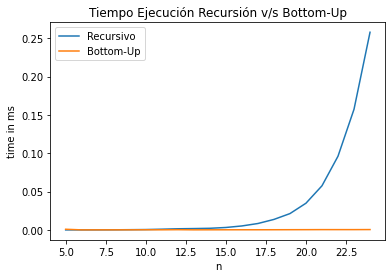

In [36]:
w=[]; r=[]; y=[]

#sns.set(rc={'figure.figsize':(12,8)})

for j in range(5,25):

  p = cutrod_instance_generator(j)
  n = len(p)

  l = repeat(setup="from __main__ import cutRodRec", stmt=f"cutRodRec({p},{n},{False})", repeat=1, number=5)
  u = repeat(setup="from __main__ import rodCutBotUp", stmt=f"rodCutBotUp({p},{n},{False})", repeat=1, number=5)

  w.append(j)
  r.append(l)
  y.append(u)


plt.plot(w,r)
plt.plot(w,y)
plt.legend(["Recursivo","Bottom-Up"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title('Tiempo Ejecución Recursión v/s Bottom-Up')
plt.show()

### **ANÁLISIS DE RESULTADOS**

Por lo que pudimos observar con anterioridad, el algoritmo bottom up es una solución óptima para resolver este problema, mientras que resolverlo de forma recursiva no es eficiente, ya que si visualizamos la gráfica este último crece exponencialmente a medida que la cantidad de problemas a resolver aumenta.

## **5.2 Cantidad Subproblemas (Bottom-Up)**

A continuación, la siguiente gráfica se muestra el tiempo de ejecución del algoritmo Bottom-Up a medida que el tamaño del arreglo de entrada aumenta.

Todo esto calculadas matemáticamente. Vamos a tener en cuenta que los tamaños de los problemas serán de $n$ $ϵ$ $[5,200]$.

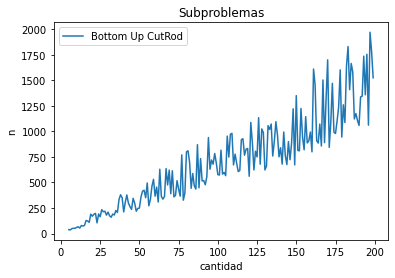

In [34]:
x=[]
y=[n for n in range(5,200)]

for n in range(5,200):

  A = cutrod_instance_generator(n)
  max, corte = rodCutBotUp(A,n,False)

  x.append(max)
  
plt.plot(y,x)
plt.legend(["Bottom Up CutRod"])
plt.title("Subproblemas")

plt.xlabel('cantidad')
plt.ylabel('n')
plt.show()

### **ANÁLISIS DE RESULTADOS**

Como se puede observar en la gráfica, podemos concluir que mientras más grande sea el problema, la cantidad de subproblemas a resolver naturalmente crecerá, ya que esta solución depende del tamaño de entrada del problema. 

Aunque esta deba ser lineal, como los casos son aleatorios se forman los conocidos *peaks*. Pero como se dijo anteriormente, el crecimiento se debe netamente a que son $n-1$ subproblemas a resolver, para un problema de tamaño $n$.